# Importing Labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

# loading dataset

In [2]:
data = pd.read_excel("Retail-Ecommerce.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA


# Cleaning dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# drop duplicates from dataset
data.drop_duplicates(inplace=True)

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [7]:
# remove null values 
data= data[pd.notnull(data['CustomerID'])]

In [8]:
data.Country.value_counts(normalize=True)

United Kingdom          0.888258
Germany                 0.023605
France                  0.021103
EIRE                    0.018613
Spain                   0.006295
Netherlands             0.005904
Belgium                 0.005152
Switzerland             0.004674
Portugal                0.003663
Australia               0.003132
Norway                  0.002704
Italy                   0.001999
Channel Islands         0.001885
Finland                 0.001731
Cyprus                  0.001521
Sweden                  0.001148
Austria                 0.000998
Denmark                 0.000969
Japan                   0.000891
Poland                  0.000849
USA                     0.000725
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000570
Iceland                 0.000453
Canada                  0.000376
Greece                  0.000364
Malta                   0.000316
United Arab Emirates    0.000169
European Community      0.000152
RSA       

<AxesSubplot:>

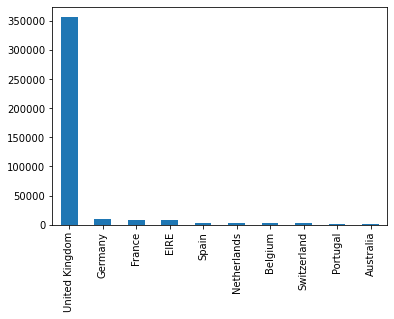

In [9]:
#Top ten country's customer
data.Country.value_counts()[:10].plot(kind='bar')

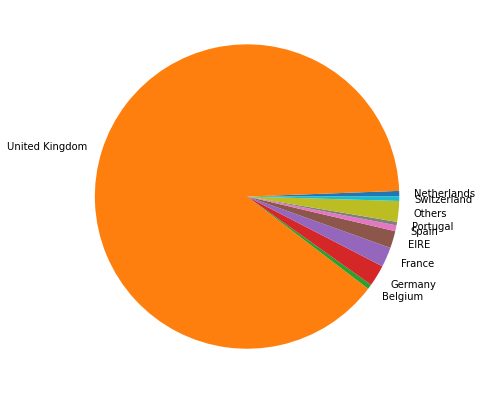

In [10]:
# Creating dataset 
country = ['Netherlands','United Kingdom', 'Belgium','Germany'   , 'France' , 'EIRE'  , 'Spain'    , 'Portugal'  , 'Others','Switzerland']
invoice = [2363,354345,2031,9042,8342,7238,2485 ,1462,8774,1842]
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(invoice, labels = country) 
  
# show plot 
plt.show() 

In [11]:
#Keep only United Kingdom data
data=data[data.Country=='United Kingdom']
data.Country.nunique()

1

In [12]:
# removing all the invoice number who starts with 'C' as they are returned orders
data= data[data['InvoiceNo'].str.startswith('C','A')!=True]
data.shape

(349227, 8)

In [13]:
data['InvoiceNo']=data['InvoiceNo'].astype(int)

Text(0, 0.5, 'Probablity Density')

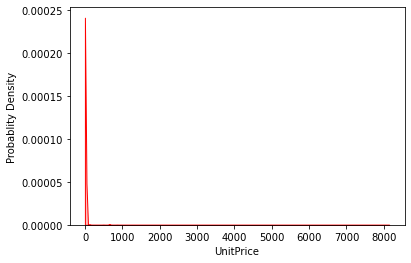

In [14]:
x_values = data['UnitPrice']

sns.kdeplot(x_values, color='r', shade=True, Label='UnitPrice') 
  
# Setting the X and Y Label 
plt.xlabel('UnitPrice') 
plt.ylabel('Probablity Density')

In [15]:
data = data[(data['UnitPrice']!=0)]

In [16]:
data.UnitPrice.describe()

count    349203.000000
mean          2.972328
std          17.990908
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Text(0, 0.5, 'Probablity Density')

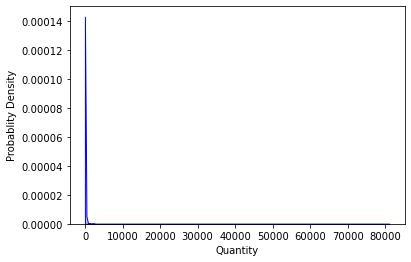

In [17]:
x_values = data['Quantity']

sns.kdeplot(x_values, color='b', shade=True, Label='Quantity') 
  
# Setting the X and Y Label 
plt.xlabel('Quantity') 
plt.ylabel('Probablity Density')

In [18]:
data.Quantity.describe()

count    349203.000000
mean         12.145672
std         190.628818
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [19]:
data=data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head(2)

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [20]:
data['InvoiceDate'].min(),data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   349203 non-null  float64       
 1   InvoiceDate  349203 non-null  datetime64[ns]
 2   InvoiceNo    349203 non-null  int32         
 3   Quantity     349203 non-null  int64         
 4   UnitPrice    349203 non-null  float64       
 5   TotalPrice   349203 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 17.3 MB


In [22]:
#data = pd.read_csv(r"C:\Users\PRANAV\Desktop\Project\after_eda.csv")
#data.head()

# RFM analysis

In [23]:
PRESENT = dt.datetime(2011,12,11)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [24]:
#Recency = present Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        f'TotalPrice': lambda price: price.sum()})
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [25]:
#Convert Invoice Date into type int
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)

In [26]:
# Change the name of columns
rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'TotalPrice':'Monetary'},inplace=True)
rfm.reset_index().head()               

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4412,33053.19
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


Text(0, 0.5, 'Probablity Density')

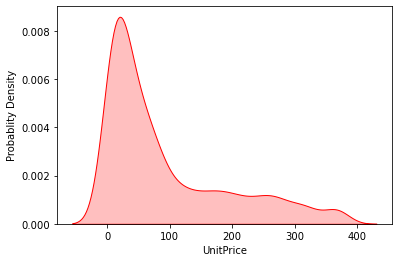

In [27]:
sns.kdeplot(rfm['Recency'], color='r', shade=True, Label='Recency') 
  
# Setting the X and Y Label 
plt.xlabel('UnitPrice') 
plt.ylabel('Probablity Density')

Text(0, 0.5, 'Probablity Density')

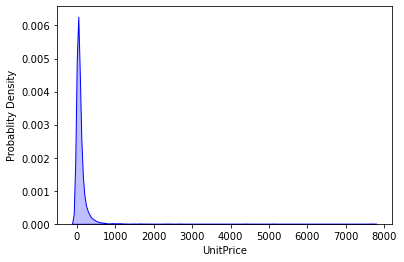

In [28]:
sns.kdeplot(rfm['Frequency'], color='b', shade=True, Label='Frequency') 
  
# Setting the X and Y Label 
plt.xlabel('UnitPrice') 
plt.ylabel('Probablity Density')

Text(0, 0.5, 'Probablity Density')

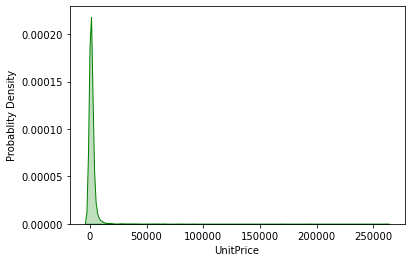

In [29]:

sns.kdeplot(rfm['Monetary'], color='g', shade=True, Label='Monetary') 
  
# Setting the X and Y Label 
plt.xlabel('UnitPrice') 
plt.ylabel('Probablity Density')

In [30]:
#converting Recency,Frequency,Monetary into quartile range by using pandas qcut method
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12747.0,3,103,4196.01,1,1,1
12748.0,1,4412,33053.19,1,1,1
12749.0,4,199,4090.88,1,1,1
12820.0,4,59,942.34,1,2,2


In [31]:
#combine all three quartile into one columns by adding
rfm['RFM_score']=rfm.r_quartile.astype(str)+rfm.f_quartile.astype(str)+rfm.m_quartile.astype(str)
rfm['RFM_Total']=rfm.r_quartile.astype(int)+rfm.f_quartile.astype(int)+rfm.m_quartile.astype(int)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_score,RFM_Total
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12747.0,3,103,4196.01,1,1,1,111,3
12748.0,1,4412,33053.19,1,1,1,111,3
12749.0,4,199,4090.88,1,1,1,111,3
12820.0,4,59,942.34,1,2,2,122,5


In [32]:
#rfm.to_csv(r"C:\Users\PRANAV\Desktop\Project\rfm.csv")

# CLTV

In [33]:
cltv= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                           'InvoiceNo': lambda num: len(num),
                                           'Quantity': lambda quant: quant.sum(),
                                           'TotalPrice': lambda price: price.sum()})

In [34]:
cltv.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPrice
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4412,25287,33053.19
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [35]:
#Renaming the column names
cltv.columns=['num_days','num_transactions','num_units','spent_money']


In [36]:
# Average Order Value
cltv['avg_order_value']=cltv['spent_money']/cltv['num_transactions']
cltv.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4412,25287,33053.19,7.491657
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [37]:
purchase_frequency=sum(cltv['num_transactions'])/cltv.shape[0]

In [38]:
# Repeat Rate
repeat_rate=cltv[cltv.num_transactions > 1].shape[0]/cltv.shape[0]

In [39]:
#Churn Rate
churn_rate=1-repeat_rate

In [40]:
# Profit Margin
cltv['profit_margin']=cltv['spent_money']*0.05

In [41]:
# Customer Value
cltv['CLV']=(cltv['avg_order_value']*purchase_frequency)/churn_rate

In [42]:
#Customer Lifetime Value
cltv['cust_lifetime_value']=cltv['CLV']*cltv['profit_margin']

In [43]:
data['month_yr'] = data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

In [44]:
sale=data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPrice',aggfunc='sum',fill_value=0).reset_index()

In [45]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1065.57,896.16,4185.00,999.00,381.59,417.12,1081.45,1923.62,1165.37,2223.17,10453.69,2199.30,6062.15,31987.62
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


In [46]:
Time = sale
c = sale.iloc[:,1:14]
time = []
for i in range(len(c.index)):
    time.append((c.iloc[i] != 0.00).sum())
    
Time['Time'] = time
Time

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV,Time
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60,1
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01,9
2,12748.0,1065.57,896.16,4185.00,999.00,381.59,417.12,1081.45,1923.62,1165.37,2223.17,10453.69,2199.30,6062.15,31987.62,13
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88,4
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,180.60,1
3916,18281.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,80.82,1
3917,18282.0,0.00,100.21,0.00,77.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,178.05,2
3918,18283.0,115.60,0.00,0.00,208.00,100.95,213.75,139.89,296.52,0.00,85.22,637.71,112.99,134.90,1929.93,10


In [47]:
c = c.astype(bool).astype(int)
c.mask(c.ne(0), 1, inplace = True)
c

month_yr,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,1,1,0,1,0,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,1,0,1,0,0,0,0,0,1,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,0,0,0,0,0,0,0,0,1,0,0,0,0
3916,0,0,0,0,0,0,0,1,0,0,0,0,0
3917,0,1,0,1,0,0,0,0,0,0,0,0,0
3918,1,0,0,1,1,1,1,1,0,1,1,1,1


In [48]:
t= pd.Series(Time['Time'])
t.shape

(3920,)

In [49]:
t_quartile = []
for i in t:
    if i==1 :
        t_quartile.append(4)
    elif i == 2:
        t_quartile.append(4)
    elif i == 3:
        t_quartile.append(4)
    elif i == 4:
        t_quartile.append(3)
    elif i == 5:
        t_quartile.append(3)
    elif i == 6:
        t_quartile.append(3)
    elif i == 7:
        t_quartile.append(2)
    elif i == 8 :
        t_quartile.append(2)
    elif i == 9 :
        t_quartile.append(2)
    else:
        t_quartile.append(1)

In [50]:
t_quartile = pd.Series(t_quartile)
t_quartile

0       4
1       2
2       1
3       3
4       3
       ..
3915    4
3916    4
3917    4
3918    1
3919    4
Length: 3920, dtype: int64

In [51]:
df = pd.concat([t_quartile,Time],axis=1,names='t_quartile')
df

,0,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV,Time
0,4,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60,1
1,2,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01,9
2,1,12748.0,1065.57,896.16,4185.00,999.00,381.59,417.12,1081.45,1923.62,1165.37,2223.17,10453.69,2199.30,6062.15,31987.62,13
3,3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88,4
4,3,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,4,18280.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,180.60,1
3916,4,18281.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,80.82,1
3917,4,18282.0,0.00,100.21,0.00,77.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,178.05,2
3918,1,18283.0,115.60,0.00,0.00,208.00,100.95,213.75,139.89,296.52,0.00,85.22,637.71,112.99,134.90,1929.93,10


In [52]:
df.rename(columns={0:'t_quartile'},inplace=True)

In [53]:
df = pd.merge(rfm,df,on='CustomerID')
df

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_score,RFM_Total,t_quartile,...,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV,Time
0,12346.0,326,1,77183.60,4,4,1,441,9,4,...,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60,1
1,12747.0,3,103,4196.01,1,1,1,111,3,2,...,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01,9
2,12748.0,1,4412,33053.19,1,1,1,111,3,1,...,417.12,1081.45,1923.62,1165.37,2223.17,10453.69,2199.30,6062.15,31987.62,13
3,12749.0,4,199,4090.88,1,1,1,111,3,3,...,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88,4
4,12820.0,4,59,942.34,1,2,2,122,5,3,...,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,278,10,180.60,4,4,4,444,12,4,...,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,180.60,1
3916,18281.0,181,7,80.82,4,4,4,444,12,4,...,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,80.82,1
3917,18282.0,8,12,178.05,1,4,4,144,9,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,178.05,2
3918,18283.0,4,721,2045.53,1,1,1,111,3,1,...,213.75,139.89,296.52,0.00,85.22,637.71,112.99,134.90,1929.93,10


In [54]:
df['RFM_score']=df.r_quartile.astype(str)+df.f_quartile.astype(str)+df.m_quartile.astype(str)+df.t_quartile.astype(str)
df['RFM_Total']=df.r_quartile.astype(int)+df.f_quartile.astype(int)+df.m_quartile.astype(int)+df.t_quartile.astype(int)
df

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_score,RFM_Total,t_quartile,...,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV,Time
0,12346.0,326,1,77183.60,4,4,1,4414,13,4,...,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60,1
1,12747.0,3,103,4196.01,1,1,1,1112,5,2,...,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01,9
2,12748.0,1,4412,33053.19,1,1,1,1111,4,1,...,417.12,1081.45,1923.62,1165.37,2223.17,10453.69,2199.30,6062.15,31987.62,13
3,12749.0,4,199,4090.88,1,1,1,1113,6,3,...,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88,4
4,12820.0,4,59,942.34,1,2,2,1223,8,3,...,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,278,10,180.60,4,4,4,4444,16,4,...,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,180.60,1
3916,18281.0,181,7,80.82,4,4,4,4444,16,4,...,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,80.82,1
3917,18282.0,8,12,178.05,1,4,4,1444,13,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,178.05,2
3918,18283.0,4,721,2045.53,1,1,1,1111,4,1,...,213.75,139.89,296.52,0.00,85.22,637.71,112.99,134.90,1929.93,10


In [55]:
df=df[['CustomerID','Recency','Frequency','Monetary','Time','r_quartile','f_quartile','m_quartile','t_quartile','RFM_score','RFM_Total']]
df

,CustomerID,Recency,Frequency,Monetary,Time,r_quartile,f_quartile,m_quartile,t_quartile,RFM_score,RFM_Total
0,12346.0,326,1,77183.60,1,4,4,1,4,4414,13
1,12747.0,3,103,4196.01,9,1,1,1,2,1112,5
2,12748.0,1,4412,33053.19,13,1,1,1,1,1111,4
3,12749.0,4,199,4090.88,4,1,1,1,3,1113,6
4,12820.0,4,59,942.34,4,1,2,2,3,1223,8
...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,278,10,180.60,1,4,4,4,4,4444,16
3916,18281.0,181,7,80.82,1,4,4,4,4,4444,16
3917,18282.0,8,12,178.05,2,1,4,4,4,1444,13
3918,18283.0,4,721,2045.53,10,1,1,1,1,1111,4


# K-mean clustering

In [56]:
df_mean=df.copy()
df_mean.head()

,CustomerID,Recency,Frequency,Monetary,Time,r_quartile,f_quartile,m_quartile,t_quartile,RFM_score,RFM_Total
0,12346.0,326,1,77183.60,1,4,4,1,4,4414,13
1,12747.0,3,103,4196.01,9,1,1,1,2,1112,5
2,12748.0,1,4412,33053.19,13,1,1,1,1,1111,4
3,12749.0,4,199,4090.88,4,1,1,1,3,1113,6
4,12820.0,4,59,942.34,4,1,2,2,3,1223,8


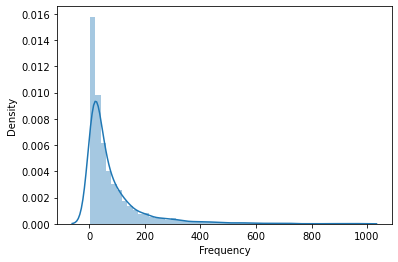

In [57]:
#Data distribution defor data normalization for Frequency

Frequency_Plot = df_mean.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)


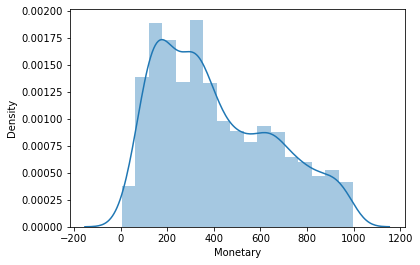

In [58]:
#Data distribution defor data normalization for Monetary

Monetary_Plot = df_mean.query('Monetary < 1000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [59]:
#Perform Log transformation to bring data into normal  distribution
log_data = df_mean[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [60]:
log_data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

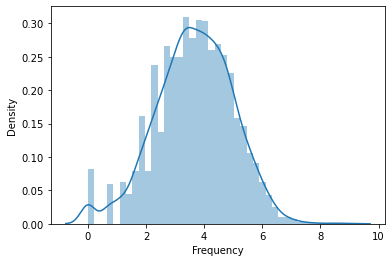

In [61]:
#Data distribution after data normalization for Frequency

Frequency_Plot = log_data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)


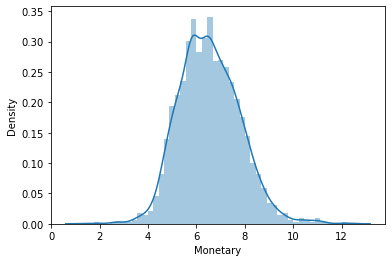

In [62]:
#Data distribution after data normalization for Monetary

Monetary_Plot = log_data.query('Monetary < 1000')['Monetary']
ax = sns.distplot(Monetary_Plot)

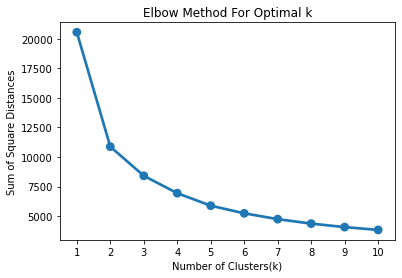

In [63]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(log_data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [64]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(log_data)

#Find the clusters for the observation given in the dataset
df_mean['Cluster'] = KMean_clust.labels_
df_mean.head(20)

,CustomerID,Recency,Frequency,Monetary,Time,r_quartile,f_quartile,m_quartile,t_quartile,RFM_score,RFM_Total,Cluster
0,12346.0,326,1,77183.60,1,4,4,1,4,4414,13,0
1,12747.0,3,103,4196.01,9,1,1,1,2,1112,5,2
2,12748.0,1,4412,33053.19,13,1,1,1,1,1111,4,2
3,12749.0,4,199,4090.88,4,1,1,1,3,1113,6,2
4,12820.0,4,59,942.34,4,1,2,2,3,1223,8,2
5,12821.0,215,6,92.72,1,4,4,4,4,4444,16,3
6,12822.0,71,46,948.88,1,3,2,2,4,3224,11,0
7,12823.0,75,5,1759.50,4,3,4,1,3,3413,11,3
8,12824.0,60,25,397.12,1,3,3,3,4,3334,13,1
9,12826.0,3,91,1474.72,6,1,2,2,3,1223,8,2


In [65]:
import pickle
pickle_out = open('KMean_clust.pkl','wb')
pickle.dump(KMean_clust,pickle_out)
pickle_out.close()

In [66]:
df_mean['Cluster'].value_counts()

0    1189
3    1160
2     797
1     774
Name: Cluster, dtype: int64

In [67]:
month = ['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 'Jun-2011', 'Jul-2011',
         'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011', 'Jan-2012']
Total_Customer = []
Total_Customer.append(c['Dec-2010'].sum())
Total_Customer.append(c['Jan-2011'].sum())
Total_Customer.append(c['Feb-2011'].sum())
Total_Customer.append(c['Mar-2011'].sum())
Total_Customer.append(c['Apr-2011'].sum())
Total_Customer.append(c['May-2011'].sum())
Total_Customer.append(c['Jun-2011'].sum())
Total_Customer.append(c['Jul-2011'].sum())
Total_Customer.append(c['Aug-2011'].sum())
Total_Customer.append(c['Sep-2011'].sum())
Total_Customer.append(c['Oct-2011'].sum())
Total_Customer.append(c['Nov-2011'].sum())
Total_Customer.append(c['Dec-2011'].sum())
Total_Customer.append((df_mean['Cluster']==0).sum())

In [68]:
Total_Customer

[815, 647, 679, 880, 784, 962, 889, 859, 834, 1146, 1230, 1505, 560, 1189]

In [69]:
bar = pd.DataFrame(columns= ['Month', 'Customers'])
bar['Month'] = month
bar['Customers'] = Total_Customer
bar

,Month,Customers
0,Dec-2010,815
1,Jan-2011,647
2,Feb-2011,679
3,Mar-2011,880
4,Apr-2011,784
5,May-2011,962
6,Jun-2011,889
7,Jul-2011,859
8,Aug-2011,834
9,Sep-2011,1146


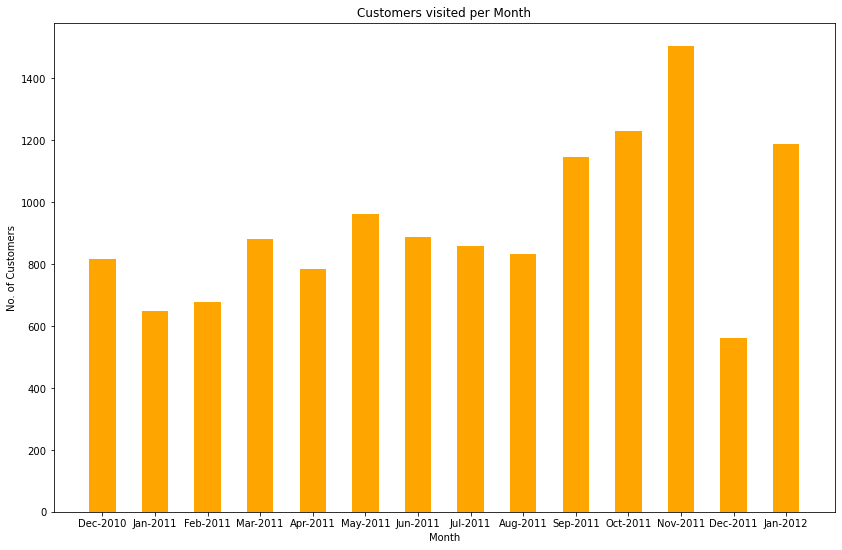

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (14, 9))

# creating the bar plot
plt.bar(bar['Month'], bar['Customers'], color ='orange',width = 0.5)
plt.xlabel("Month")
plt.ylabel("No. of Customers")
plt.title("Customers visited per Month")
plt.show()

In [71]:
salepermonth = sale.iloc[:,0:14]
salepermonth = salepermonth[['CustomerID','Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 
                             'Jun-2011', 'Jul-2011','Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011']]
salepermonth

month_yr,CustomerID,Dec-2010,Jan-2011,Feb-2011,Mar-2011,Apr-2011,May-2011,Jun-2011,Jul-2011,Aug-2011,Sep-2011,Oct-2011,Nov-2011,Dec-2011
0,12346.0,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,706.27,303.04,0.00,310.78,0.00,771.31,376.30,0.00,301.70,0.00,675.38,312.73,438.50
2,12748.0,4185.00,417.12,381.59,1165.37,1065.57,2223.17,1923.62,1081.45,896.16,6062.15,2199.30,10453.69,999.00
3,12749.0,0.00,0.00,0.00,0.00,0.00,859.10,0.00,0.00,1896.13,0.00,0.00,572.59,763.06
4,12820.0,0.00,170.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,217.77,343.76,0.00,210.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3916,18281.0,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,0.00
3917,18282.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.21,0.00,0.00,0.00,77.84
3918,18283.0,0.00,213.75,100.95,0.00,115.60,85.22,296.52,139.89,0.00,134.90,112.99,637.71,208.00


CustomerID: 12346


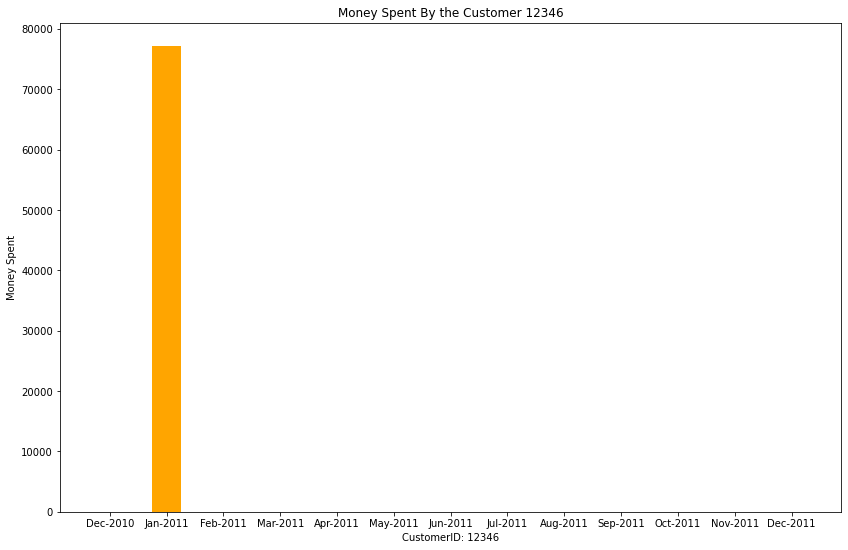

,CustomerID,Recency,Frequency,Monetary,Time,r_quartile,f_quartile,m_quartile,t_quartile,RFM_score,RFM_Total
0,12346.0,326,1,77183.6,1,4,4,1,4,4414,13


In [72]:
x = int(input("CustomerID: "))
y = (salepermonth.loc[salepermonth['CustomerID'] == x])
y = y.drop(y.iloc[:,0:1], axis = 1)

month = ['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 'Jun-2011', 'Jul-2011',
         'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011']
#rfm dataframe
z = pd.DataFrame(df.loc[df['CustomerID'] == x])
# Plotting Graph
fig = plt.figure(figsize = (14, 9))
plt.bar(month,y.iloc[0] ,color ='orange',width = 0.5)
plt.xlabel("CustomerID: {}".format(x))
plt.ylabel("Money Spent")
plt.title("Money Spent By the Customer {}".format(x))
plt.show()
#print(y)
z

In [76]:
import numpy as np
import pickle
import pandas as pd

import streamlit as st

from PIL import Image

pickle_in = open('KMean_clust.pkl', 'rb')
model = pickle.load(pickle_in)
